In [2]:
install.packages("psych")
install.packages("GPArotation")
install.packages("lavaan")
install.packages("rsample")
install.packages("corrplot")


library(tidyverse)
library(rsample)
library(corrplot)
library(psych)
library(lavaan)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


This is lavaan 0.6-15
lavaan is FREE software! Please report any bugs.


Attaching package: ‘lavaan’


The following object is masked from ‘package:psych’:

    cor2cov




In [4]:
data<-readxl::read_xlsx("data.xlsx")%>%
  select(-1)

In [5]:
x<-initial_split(data, prop = 60/100)


data_ex<-training(x)

data_conf<-testing(x)


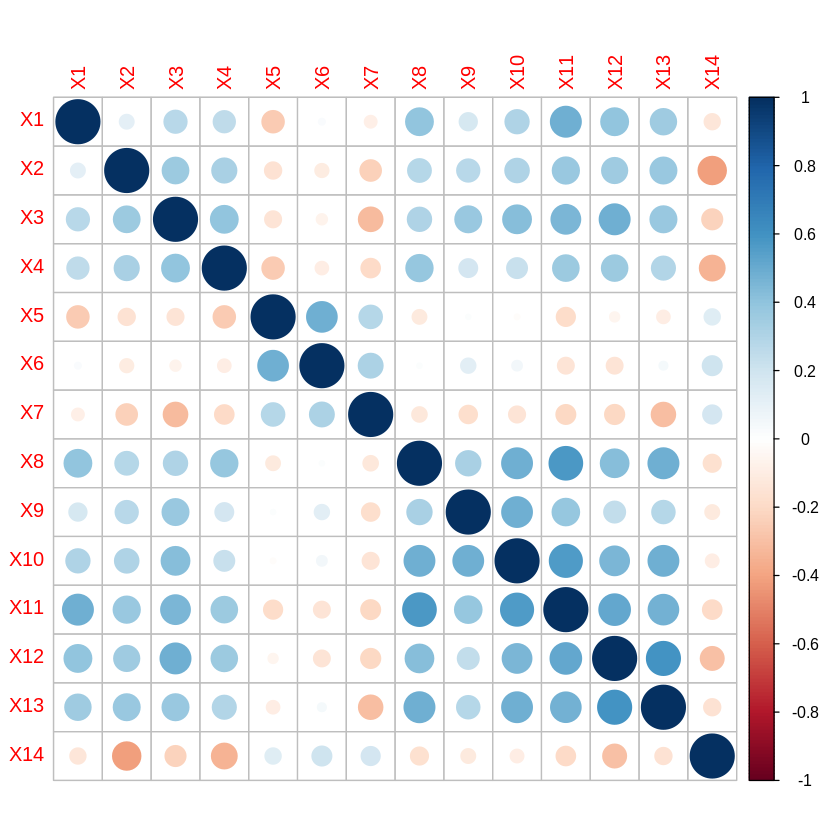

In [7]:
polychor_matrix<-polychoric(data_ex)

corrplot(polychor_matrix$rho)

In [8]:
polychor_matrix

Call: polychoric(x = data_ex)
Polychoric correlations 
    X1    X2    X3    X4    X5    X6    X7    X8    X9    X10   X11  
X1   1.00                                                            
X2   0.11  1.00                                                      
X3   0.27  0.37  1.00                                                
X4   0.25  0.32  0.40  1.00                                          
X5  -0.26 -0.15 -0.15 -0.26  1.00                                    
X6   0.02 -0.10 -0.07 -0.09  0.48  1.00                              
X7  -0.08 -0.24 -0.31 -0.20  0.28  0.32  1.00                        
X8   0.39  0.29  0.30  0.38 -0.11  0.02 -0.12  1.00                  
X9   0.17  0.28  0.37  0.18  0.02  0.12 -0.17  0.33  1.00            
X10  0.30  0.31  0.42  0.22 -0.02  0.06 -0.15  0.49  0.48  1.00      
X11  0.49  0.38  0.45  0.36 -0.19 -0.15 -0.20  0.58  0.39  0.56  1.00
X12  0.40  0.35  0.49  0.36 -0.05 -0.15 -0.21  0.42  0.25  0.45  0.51
X13  0.36  0.37  0.37  0.30 -0.09  

In [9]:
as.data.frame(polychor_matrix$rho)%>%
  mutate(y=paste("X",row_number()))%>%
  pivot_longer(starts_with("X"))%>%
  filter(value^2<=.09)%>%
  group_by(y)%>%
  count()%>%
  filter(n>=10)

y,n
<chr>,<int>
X 14,11
X 5,12
X 6,11
X 7,10


Loading required namespace: GPArotation

Warning message in GPFoblq(A, Tmat = Tmat, normalize = normalize, eps = eps, maxit = maxit, :
“convergence not obtained in GPFoblq. 1000 iterations used.”
Warning message in GPFoblq(A, Tmat = Tmat, normalize = normalize, eps = eps, maxit = maxit, :
“convergence not obtained in GPFoblq. 1000 iterations used.”



Number of factors
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = FALSE, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.8  with  1  factors
VSS complexity 2 achieves a maximimum of 0.79  with  2  factors
The Velicer MAP achieves a minimum of 0.03  with  1  factors 
Empirical BIC achieves a minimum of  -101.6  with  2  factors
Sample Size adjusted BIC achieves a minimum of  -9.84  with  4  factors

Statistics by number of factors 
   vss1 vss2   map dof   chisq    prob sqresid  fit RMSEA BIC SABIC complex
1  0.80 0.00 0.028  35 8.3e+01 8.5e-06     4.7 0.80 0.093 -94  17.0     1.0
2  0.65 0.79 0.039  26 4.6e+01 8.3e-03     4.9 0.79 0.070 -85  -2.8     1.2
3  0.43 0.63 0.059  18 2.8e+01 5.9e-02     7.5 0.67 0.060 -63  -5.8     1.5
4  0.41 0.54 0.089  11 1.1e+01 4.5e-01     8.8 0.61 0.000 -45  -9.8     1.5
5  0.39 0.51 0.129   5 2.8e+00 7.3e-01     9.2 0.60 0.000 -22  -6.7     1.7
6  0.38 0.47 0.198   0 7.6

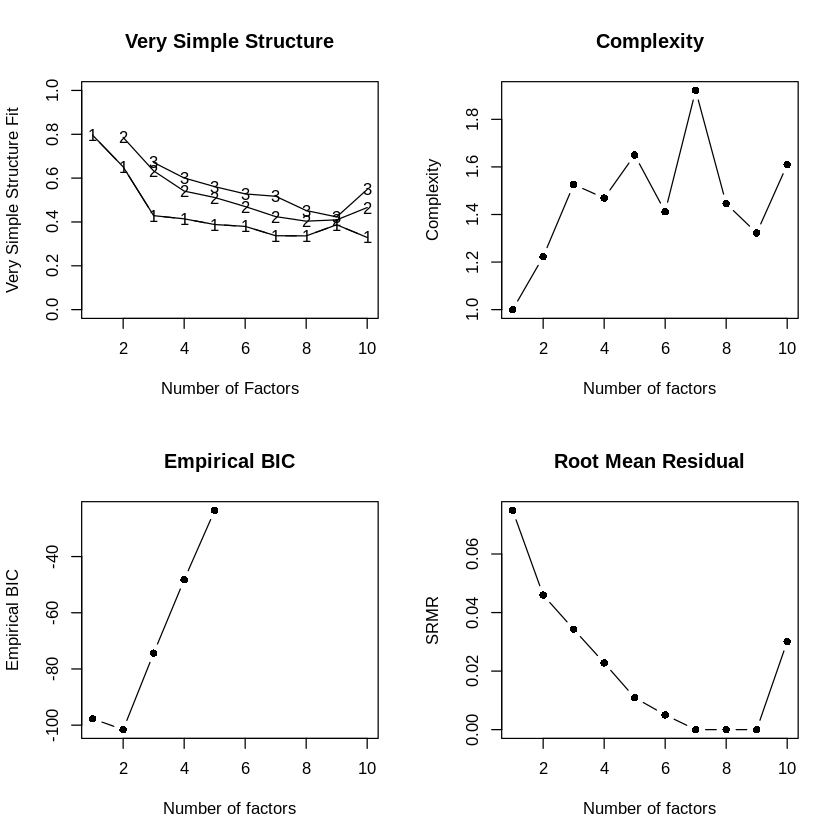

In [10]:
data_ex%>%
  select(-c(X1,X5,X6,X7))%>%
  nfactors(cor="poly",fm ="mle",rotate = "oblimin")

In [11]:
fa2<-data_ex%>%
  select(-c(X1,X5,X6,X7))%>%
  fa(nfactors=2,cor="poly",fm ="ml",rotate = "oblimin")

print(fa2,sort=TRUE,cut=.3)

Factor Analysis using method =  ml
Call: fa(r = ., nfactors = 2, rotate = "oblimin", fm = "ml", cor = "poly")
Standardized loadings (pattern matrix) based upon correlation matrix
    item  ML1   ML2   h2   u2 com
X10    6 0.82       0.58 0.42 1.1
X11    7 0.75       0.59 0.41 1.0
X8     4 0.67       0.46 0.54 1.0
X13    9 0.65       0.47 0.53 1.0
X12    8 0.57       0.50 0.50 1.3
X9     5 0.55       0.28 0.72 1.0
X3     2 0.50       0.39 0.61 1.4
X14   10      -0.70 0.46 0.54 1.0
X2     1       0.45 0.39 0.61 1.7
X4     3       0.42 0.34 0.66 1.7

                       ML1  ML2
SS loadings           3.27 1.17
Proportion Var        0.33 0.12
Cumulative Var        0.33 0.44
Proportion Explained  0.74 0.26
Cumulative Proportion 0.74 1.00

 With factor correlations of 
     ML1  ML2
ML1 1.00 0.41
ML2 0.41 1.00

Mean item complexity =  1.2
Test of the hypothesis that 2 factors are sufficient.

df null model =  45  with the objective function =  3.4 with Chi Square =  516.13
df of  the mode

In [12]:
fa3<-data_ex%>%
  select(-c(X1,X5,X6,X7))%>%
  fa(nfactors=2,cor="poly",fm ="ml",rotate = "varimax")

print(fa3,sort=TRUE,cut=.3)

Factor Analysis using method =  ml
Call: fa(r = ., nfactors = 2, rotate = "varimax", fm = "ml", cor = "poly")
Standardized loadings (pattern matrix) based upon correlation matrix
    item   ML1   ML2   h2   u2 com
X10    6  0.76       0.58 0.42 1.0
X11    7  0.72       0.59 0.41 1.3
X8     4  0.64       0.46 0.54 1.2
X13    9  0.63       0.47 0.53 1.4
X12    8  0.57  0.41 0.50 0.50 1.8
X9     5  0.51       0.28 0.72 1.1
X3     2  0.50  0.37 0.39 0.61 1.9
X14   10       -0.68 0.46 0.54 1.0
X2     1  0.32  0.54 0.39 0.61 1.6
X4     3        0.50 0.34 0.66 1.6

                       ML1  ML2
SS loadings           2.91 1.53
Proportion Var        0.29 0.15
Cumulative Var        0.29 0.44
Proportion Explained  0.66 0.34
Cumulative Proportion 0.66 1.00

Mean item complexity =  1.4
Test of the hypothesis that 2 factors are sufficient.

df null model =  45  with the objective function =  3.4 with Chi Square =  516.13
df of  the model are 26  and the objective function was  0.31 

The root mean

In [13]:
fa4<-data_ex%>%
  select(-c(X1,X5,X6,X7,X4,X3,X12))%>%
  fa(nfactors=2,cor="poly",fm ="ml",rotate = "varimax")

print(fa4,sort=TRUE,cut=.3)

Factor Analysis using method =  ml
Call: fa(r = ., nfactors = 2, rotate = "varimax", fm = "ml", cor = "poly")
Standardized loadings (pattern matrix) based upon correlation matrix
    item   ML2   ML1   h2    u2 com
X11    5  0.74       0.60 0.404 1.2
X10    4  0.73       0.55 0.449 1.1
X8     2  0.70       0.51 0.494 1.1
X13    6  0.60       0.42 0.580 1.3
X9     3  0.50       0.28 0.721 1.2
X2     1        0.97 1.00 0.005 1.1
X14    7       -0.40 0.17 0.828 1.2

                       ML2  ML1
SS loadings           2.24 1.28
Proportion Var        0.32 0.18
Cumulative Var        0.32 0.50
Proportion Explained  0.64 0.36
Cumulative Proportion 0.64 1.00

Mean item complexity =  1.2
Test of the hypothesis that 2 factors are sufficient.

df null model =  21  with the objective function =  1.98 with Chi Square =  303.17
df of  the model are 8  and the objective function was  0.07 

The root mean square of the residuals (RMSR) is  0.03 
The df corrected root mean square of the residuals is  

In [14]:
m<-'d1=~X2 + X14
    d2=~X8 + X9 + X10 + X11 + X13'

c_model<-cfa(m,
    data=data_conf,
    ordered=TRUE,
    std.lv=TRUE)

Warning message in lav_object_post_check(object):
“lavaan WARNING: some estimated ov variances are negative”


In [15]:
summary(c_model,fit.measures=TRUE, standardized=TRUE)

Warning message in lav_object_post_check(object):
“lavaan WARNING: some estimated ov variances are negative”
Warning message in lav_object_post_check(object):
“lavaan WARNING: some estimated ov variances are negative”


lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
d1,=~,X2,0,1.00760913,0.10837488,9.29744199,0.000000e+00,1.00760913,1.00760913,1.00760913
d1,=~,X14,0,-0.52503674,0.08210718,-6.39452869,1.610434e-10,-0.52503674,-0.52503674,-0.52503674
d2,=~,X8,0,0.70521370,0.06143249,11.47949027,0.000000e+00,0.70521370,0.70521370,0.70521370
d2,=~,X9,0,0.35341806,0.07706797,4.58579719,4.522575e-06,0.35341806,0.35341806,0.35341806
d2,=~,X10,0,0.74268011,0.06684663,11.11021035,0.000000e+00,0.74268011,0.74268011,0.74268011
d2,=~,X11,0,0.68687487,0.06945152,9.88999055,0.000000e+00,0.68687487,0.68687487,0.68687487
d2,=~,X13,0,0.69186012,0.06472029,10.69000421,0.000000e+00,0.69186012,0.69186012,0.69186012
X2,|,t1,0,-1.90221650,0.25002086,-7.60823110,2.775558e-14,-1.90221650,-1.90221650,-1.90221650
X2,|,t2,0,-1.43117191,0.18158807,-7.88142020,3.330669e-15,-1.43117191,-1.43117191,-1.43117191


In [16]:
install.packages("semPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sem’, ‘OpenMx’




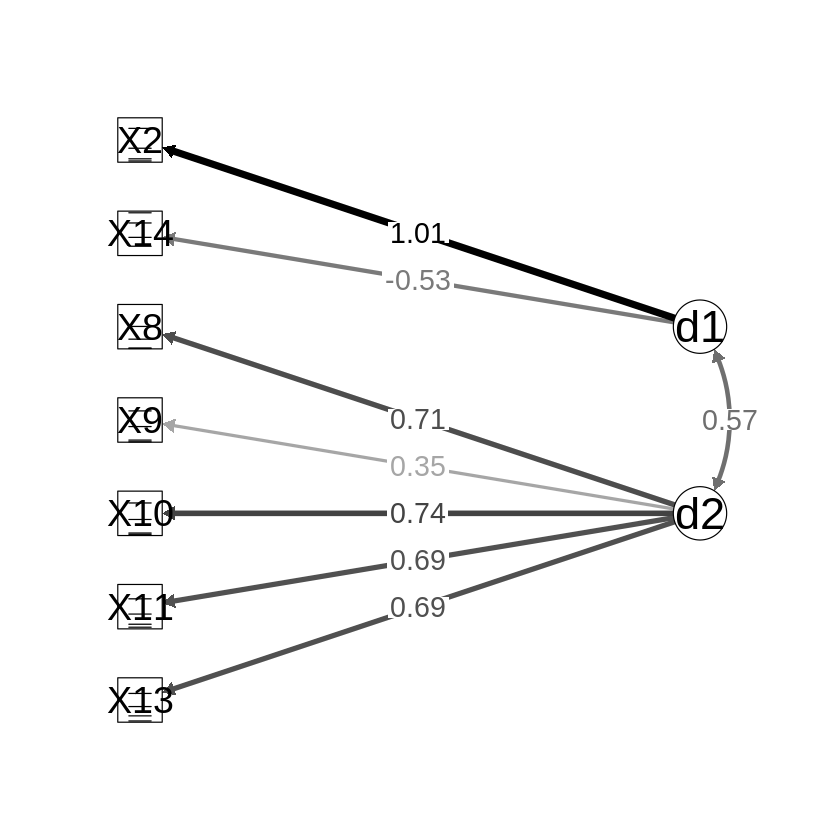

In [19]:
semPlot::semPaths(c_model,
         style = "ram",
         intercepts = FALSE,
         residuals=FALSE,
         edge.label.cex=1.5,
         optimizeLatRes = TRUE,
         exoVar = FALSE,
         sizeInt=5,
         edge.color ="black",
         esize = 6,
         label.prop=2,
         sizeLat = 6,"std",
         layout="tree",
         rotation=4,
         curve=1,
         curvature = 1.5)